<div style="text-align:center;">
    <h1 style="font-family:Arial, sans-serif; font-weight:bold; color:#FF5733">Yoga Pose Classification</h1>
</div>


<div style="text-align:center;">
    <h1 style="font-family:Arial, sans-serif; font-weight:bold; color:#7289da">CNN With VGG16 Preprocessing</h1>
</div>

In [46]:
pip install TensorFlow

^C
Note: you may need to restart the kernel to use updated packages.


## Importing Libraries

In [6]:
import os 
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
from matplotlib.image import imread
import plotly.express as px 
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## loading data and preprocessing

In [7]:
# Preprocess images and split into training and validation sets
# Using VGG16 preprocessing
image_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications
                                   .vgg16.preprocess_input, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='DATASET\\TRAIN',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="training",
                                                 classes=['warrior2', 'downdog', 'tree', 'plank', 'goddess'])

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='DATASET\\TEST',
                                                 shuffle=True,
                                                 target_size=(224, 224), 
                                                 subset="validation",
                                                 classes=['warrior2', 'downdog', 'tree', 'plank', 'goddess'])

Found 862 images belonging to 5 classes.
Found 90 images belonging to 5 classes.


## Building and  Training a CNN Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import keras



added dropout layers and early stopping to fight the overfitting.
because the CNN model had 0.99 training accuracy and 0.63 validation accuracy at first

In [9]:

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same',
           input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Dropout(0.8),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Dropout(0.5),
    Flatten(),
    Dense(units=5, activation='softmax'),                    
])

# compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# fit model
hist=model.fit(
    x=train_dataset, validation_data=validation_dataset, epochs=10, verbose=2,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=9, verbose=2, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(factor=.5, patience=3, verbose=2)
    ])

# get predictions
predictions = model.predict(x=validation_dataset, steps=len(validation_dataset), verbose=0)

Epoch 1/10


C:\anaconda3\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


87/87 - 32s - loss: 218.6577 - accuracy: 0.2575 - val_loss: 21.2621 - val_accuracy: 0.2778 - lr: 1.0000e-04 - 32s/epoch - 367ms/step
Epoch 2/10
87/87 - 29s - loss: 81.8359 - accuracy: 0.3283 - val_loss: 13.4142 - val_accuracy: 0.3889 - lr: 1.0000e-04 - 29s/epoch - 331ms/step
Epoch 3/10
87/87 - 29s - loss: 60.5493 - accuracy: 0.3770 - val_loss: 8.3210 - val_accuracy: 0.3778 - lr: 1.0000e-04 - 29s/epoch - 338ms/step
Epoch 4/10
87/87 - 28s - loss: 35.4124 - accuracy: 0.4478 - val_loss: 4.6060 - val_accuracy: 0.5000 - lr: 1.0000e-04 - 28s/epoch - 327ms/step
Epoch 5/10
87/87 - 30s - loss: 28.9807 - accuracy: 0.5255 - val_loss: 3.9508 - val_accuracy: 0.5556 - lr: 1.0000e-04 - 30s/epoch - 350ms/step
Epoch 6/10
87/87 - 29s - loss: 18.7383 - accuracy: 0.5835 - val_loss: 3.0814 - val_accuracy: 0.6667 - lr: 1.0000e-04 - 29s/epoch - 337ms/step
Epoch 7/10
87/87 - 30s - loss: 13.6807 - accuracy: 0.6473 - val_loss: 3.1826 - val_accuracy: 0.5333 - lr: 1.0000e-04 - 30s/epoch - 349ms/step
Epoch 8/10
87/

## Loading the Testing Data

## CNN Results

In [10]:
# Access training accuracy and validation accuracy
train_acc = hist.history['accuracy'][-1]
val_acc = hist.history['val_accuracy'][-1]

# Print the values
print("Training Accuracy: ", train_acc)
print("Validation Accuracy: ", val_acc)

Training Accuracy:  0.685614824295044
Validation Accuracy:  0.6000000238418579


## CNN Confusion matrix

In [37]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

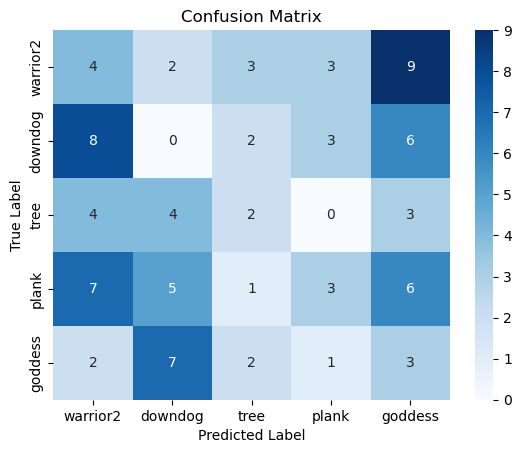

In [38]:
y_pred = np.argmax(predictions, axis=1)

# Map predicted labels to class names
class_names = ['warrior2', 'downdog', 'tree', 'plank', 'goddess']
y_true = []
for filename in validation_dataset.filenames:
    class_name = filename.split('\\')[0]  # Extract class name from filename using double backslashes
    y_true.append(class_names.index(class_name))
y_true = np.array(y_true)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(' CNN Confusion Matrix')
plt.show()






<div style="text-align:center;">
    <h1 style="font-family:Arial, sans-serif; font-weight:bold; color:#7289da">VGG16 Model</h1>
</div>

In [41]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [32]:
# Import vgg16
vgg16_model = tf.keras.applications.vgg16.VGG16()

# Create a sequential model and add the same layers as VGG16
model2 = Sequential()
for layer in vgg16_model.layers[:-1]:
  model2.add(layer)
  
# Make layers non-trainable to freeze weights/params
for layer in model.layers:
  layer.trainable=False

# add trainable output layer with 5 nodes for the 5 classes
model2.add(Dense(units=5, activation='softmax'))

# compile model
model2.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# fit model
hist2=model2.fit(x=train_dataset,
          steps_per_epoch=len(train_dataset),
          validation_data=validation_dataset,
          validation_steps=len(validation_dataset),
          epochs=8,
          verbose=2)

Epoch 1/8


C:\anaconda3\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(

KeyboardInterrupt



In [44]:
predictions2 = model2.predict(x=validation_dataset, steps=len(validation_dataset), verbose=0)

## VGG16 Results

In [45]:
# Access training accuracy and validation accuracy
train_acc2 = hist2.history['accuracy'][-1]
val_acc2 = hist2.history['val_accuracy'][-1]

# Print the values
print("Training Accuracy: ", train_acc2)
print("Validation Accuracy: ", val_acc2)

Training Accuracy:  0.6635730862617493
Validation Accuracy:  0.7777777910232544


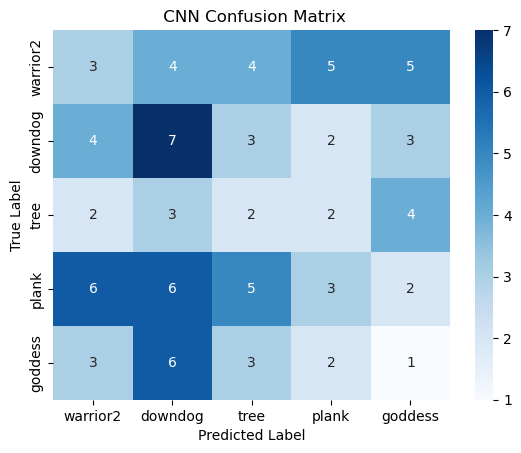

In [47]:
y_pred = np.argmax(predictions2, axis=1)

# Map predicted labels to class names
class_names = ['warrior2', 'downdog', 'tree', 'plank', 'goddess']
y_true = []
for filename in validation_dataset.filenames:
    class_name = filename.split('\\')[0]  # Extract class name from filename using double backslashes
    y_true.append(class_names.index(class_name))
y_true = np.array(y_true)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(' CNN Confusion Matrix')
plt.show()



<div style="text-align:center;">
    <h1 style="font-family:Arial, sans-serif; font-weight:bold; color:#7289da">CNN </h1>
</div>

## Libraries Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
from skimage.io import imread,imshow
from skimage import transform
import os

## loading data

In [2]:

labels=list()
path='DATASET\\TRAIN\\'
os.listdir(path)
for i in os.listdir(path):
    labels.append(i)
print(labels)    

['downdog', 'goddess', 'plank', 'tree', 'warrior2']


In [3]:
Total_sample=0
for i in os.listdir(path):
    print(f'Length of :{i}= {len(os.listdir(os.path.join(path,i)))}')
    Total_sample+=len(os.listdir(os.path.join(path,i)))
print(f'Total Samples:{Total_sample}')

Length of :downdog= 223
Length of :goddess= 178
Length of :plank= 264
Length of :tree= 159
Length of :warrior2= 250
Total Samples:1074


In [4]:
!pip install tqdm
from tqdm import tqdm

## Images processing 
Resizing

In [6]:
img_size=224     # 224x224
X=[] 
Y=[]
i=0
for idx,img in enumerate(os.listdir(path)):
    for img_name in tqdm(os.listdir(path+img)):
        if i<300:
            img_file=imread(path+img+'/'+img_name)
            if img_file is not None:
                img_file=transform.resize(img_file,(img_size,img_size,3))
                X.append(img_file)
                Y.append(idx)
        else:
            break
        i=i+1
    i=0

100%|██████████| 250/250 [00:46<00:00,  5.41it/s]


Scaling

In [7]:
X_train=np.asarray(X)
Y_train=np.asarray(Y)

In [8]:
X_train[0]


array([[[0.95323651, 0.93755023, 0.9414718 ],
        [0.95640688, 0.94072061, 0.94464218],
        [0.95686263, 0.94117635, 0.94509792],
        ...,
        [0.97700555, 0.96916241, 0.97308398],
        [0.97656109, 0.96871795, 0.97263952],
        [0.97892763, 0.97108449, 0.97500606]],

       [[0.95323651, 0.93755023, 0.9414718 ],
        [0.95640688, 0.94072061, 0.94464218],
        [0.95686263, 0.94117635, 0.94509792],
        ...,
        [0.97700555, 0.96916241, 0.97308398],
        [0.97647189, 0.96862875, 0.97255032],
        [0.97649263, 0.9686495 , 0.97257107]],

       [[0.9532589 , 0.93757262, 0.94149419],
        [0.95638283, 0.94069656, 0.94461813],
        [0.95686235, 0.94117608, 0.94509764],
        ...,
        [0.97700554, 0.96916241, 0.97308398],
        [0.97639849, 0.96855535, 0.97247692],
        [0.97448918, 0.96664604, 0.97056761]],

       ...,

       [[0.94508344, 0.90588173, 0.9098033 ],
        [0.94525572, 0.90605401, 0.90997558],
        [0.94781853, 0

loading Test Data

In [9]:
test_labels=list()
Tpath='DATASET\\TEST\\'
os.listdir(Tpath)
for i in os.listdir(Tpath):
    test_labels.append(i)
print(test_labels)    

['downdog', 'goddess', 'plank', 'tree', 'warrior2']


In [10]:
Total_sample=0
for i in os.listdir(Tpath):
    print(f'Length of :{i}= {len(os.listdir(os.path.join(Tpath,i)))}')
    Total_sample+=len(os.listdir(os.path.join(Tpath,i)))
print(f'Total Samples:{Total_sample}')

Length of :downdog= 97
Length of :goddess= 77
Length of :plank= 114
Length of :tree= 69
Length of :warrior2= 109
Total Samples:466


In [11]:
img_size=224     # 224x224
X_test=[] 
Y_test=[]
i=0
for idx,img in enumerate(os.listdir(Tpath)):
    for img_name in tqdm(os.listdir(Tpath+img)):
        if i<300:
            img_file=imread(Tpath+img+'/'+img_name)
            if img_file is not None:
                img_file=transform.resize(img_file,(img_size,img_size,3))
                X_test.append(img_file)
                Y_test.append(idx)
        else:
            break
        i=i+1
    i=0

 63%|██████▎   | 72/114 [00:34<00:04,  9.86it/s]C:\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))
100%|██████████| 109/109 [00:24<00:00,  4.51it/s]


In [12]:
X_test=np.asarray(X_test)
Y_test=np.asarray(Y_test)

# Visualisations

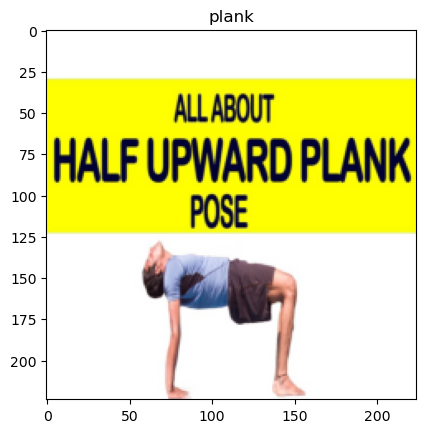

In [13]:
plt.imshow(X[401])
plt.title(labels[Y[401]])
plt.show()

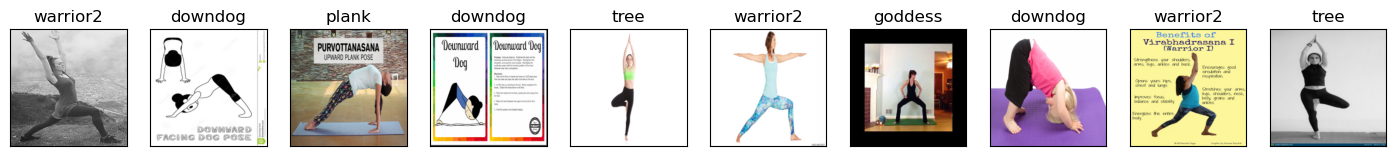

In [14]:
from random import randint
n = 50  
plt.figure(figsize=(90,40))
for i in range(10,20):
    rn=randint(0,987)
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X[rn])
    plt.title(labels[Y[rn]])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

## Building CNN Model

In [15]:
# OneHot-Encoding
from keras.utils.np_utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=len(labels))
Y_test=to_categorical(Y_test,num_classes=len(labels))

In [16]:
print('Shapes of Data Split into Train & Test Part')
print(f'Training Data->{X_train.shape},{Y_train.shape} Testing Data->{X_test.shape,Y_test.shape}')

Shapes of Data Split into Train & Test Part
Training Data->(1074, 224, 224, 3),(1074, 5) Testing Data->((466, 224, 224, 3), (466, 5))


In [17]:
Y_train.shape,Y_test.shape

((1074, 5), (466, 5))

In [18]:
# CNN Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

model = Sequential([
    Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (4, 4), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(50, (3, 3), padding='same', activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(labels), activation='softmax') # Multi-class Classification Problem
])
model.compile(loss='categorical_crossentropy',optimizer='adam'
             ,metrics=['accuracy'])

In [19]:
epoch=10
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epoch, batch_size=32, verbose=2)


Epoch 1/10
34/34 - 69s - loss: 1.7487 - accuracy: 0.2309 - val_loss: 1.5957 - val_accuracy: 0.3283 - 69s/epoch - 2s/step
Epoch 2/10
34/34 - 66s - loss: 1.5028 - accuracy: 0.3762 - val_loss: 1.1777 - val_accuracy: 0.5193 - 66s/epoch - 2s/step
Epoch 3/10
34/34 - 67s - loss: 1.1970 - accuracy: 0.5447 - val_loss: 0.9972 - val_accuracy: 0.6330 - 67s/epoch - 2s/step
Epoch 4/10
34/34 - 64s - loss: 1.0055 - accuracy: 0.6266 - val_loss: 0.9308 - val_accuracy: 0.6567 - 64s/epoch - 2s/step
Epoch 5/10
34/34 - 62s - loss: 0.7235 - accuracy: 0.7309 - val_loss: 0.8118 - val_accuracy: 0.7318 - 62s/epoch - 2s/step
Epoch 6/10
34/34 - 67s - loss: 0.4853 - accuracy: 0.8138 - val_loss: 0.8639 - val_accuracy: 0.7382 - 67s/epoch - 2s/step
Epoch 7/10
34/34 - 71s - loss: 0.2643 - accuracy: 0.9060 - val_loss: 1.0188 - val_accuracy: 0.7446 - 71s/epoch - 2s/step
Epoch 8/10
34/34 - 69s - loss: 0.1406 - accuracy: 0.9534 - val_loss: 1.3094 - val_accuracy: 0.7639 - 69s/epoch - 2s/step
Epoch 9/10
34/34 - 65s - loss: 0

In [20]:
model.save('CNN_yoga.h5')

In [21]:
score=model.evaluate(X_test,Y_test,verbose=1)

15/15 [==============================] - 4s 294ms/step - loss: 1.7144 - accuracy: 0.7296


# Confusion Matrix

15/15 [==============================] - 4s 290ms/step


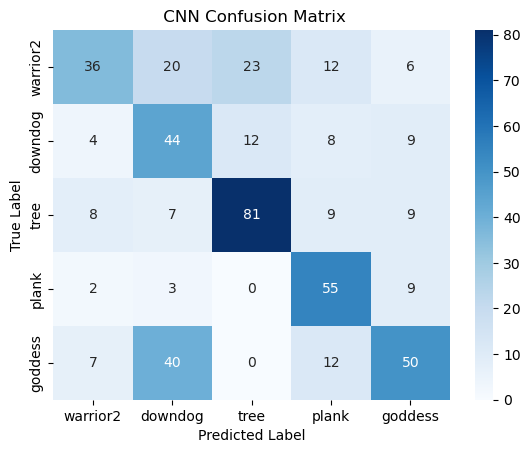

In [31]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
Y_t=np.argmax(Y_test,axis=1)
import seaborn as sns
from sklearn import metrics
cm=metrics.confusion_matrix(Y_t,y_pred)
class_names = ['warrior2', 'downdog', 'tree', 'plank', 'goddess']
# Plot confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(' CNN Confusion Matrix')
plt.show()

<div style="text-align:center;">
    <h1 style="font-family:Arial, sans-serif; font-weight:bold; color:#7289da">MoveNet Model</h1>
</div>

## imports and downloads

In [49]:
pip install tensorflow_hub


     ------------------------------------ 100.6/100.6 kB 960.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [76]:
!pip install wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=7a75e01eb51c8516482b1e7c4609b1f3407e1829501f81577cf3659dd642f163
  Stored in directory: c:\users\msi gf63\appdata\local\pip\cache\wheels\46\78\0e\8e5e2b500f83a682c8d7e7ce820638cf99faa894a662f71cf0
Successfully built wget


In [ ]:
import csv
import cv2 
import itertools
import numpy as np
import pandas as pd
import os
import sys
import tempfile
import tqdm

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_path = 'movenet_thunder.tflite'

# Download model from TF Hub and check out inference code from GitHub
!wget -q -O movenet_thunder.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/thunder/tflite/float16/4?lite-format=tflite
!git clone https://github.com/tensorflow/examples.git
pose_sample_rpi_path = os.path.join(os.getcwd(), 'examples/lite/examples/pose_estimation/raspberry_pi')
sys.path.append(pose_sample_rpi_path)

# Load MoveNet Thunder model
import utils
from data import BodyPart
from ml import Movenet
movenet = Movenet('movenet_thunder')




'wget' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.
fatal: destination path 'examples' already exists and is not an empty directory.


ValueError: Model provided has model identifier '